In [1]:
import numpy as np
import pandas as pd
from statsbombpy import sb
import networkx as nx
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch
import statistics as stats

In [2]:
#Import competition data to find season we are interested in: La Liga - 2020/2021
competition_df = sb.competitions()
season = competition_df[ (competition_df.competition_name == 'La Liga') & (competition_df.season_name == '2020/2021') ]

In [3]:
#Find the matches where Barcelona played. Could be as home team or away team
season_matches = sb.matches(competition_id = season.competition_id.iloc[0],season_id = season.season_id.iloc[0])
barcelona_matches = season_matches[ (season_matches.home_team == 'Barcelona') | ( season_matches.away_team == 'Barcelona') ]

In [52]:

def player_pie_chart(matches_df,player_name):
    season_player_events = pd.DataFrame()
    pass_count = 0
    shot_count = 0
    carry_count = 0
    for match_id_iter in matches_df.match_id[:]:
        match_iter = sb.events(match_id=match_id_iter)
        player_events = match_iter[(match_iter.player == player_name)]
        season_player_events = pd.concat([season_player_events, player_events])
    for i,row in season_player_events.iterrows():
        if row.type == 'Pass':
            pass_count+=1
        if row.type == 'Shot':
            shot_count+=1
        if row.type == 'Carry':
            carry_count+=1
    labels = ['Pass','Shot','Carry']
    sizes = [pass_count,shot_count,carry_count]

    plt.pie(sizes, autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(sizes):.0f} events)',
            shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(labels)
    plt.title('Split of passes, shots and carries for ' + player_name+ '\n' +' in the 2020/21 La Liga Season')
    plt.savefig(player_name+'_pie.png')
    plt.show()
  

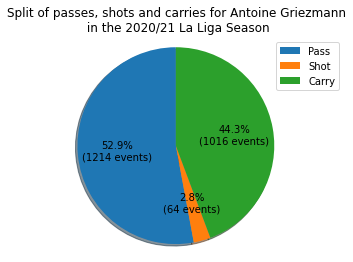

In [47]:
player_pie_chart(barcelona_matches,'Antoine Griezmann')
